# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [39]:
# Read the city data
city_df = pd.read_csv(output_data_file)
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each


for city in cities:
    response = requests.get(query_url + city).json()
    try:

        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        print(f"{city} found! Appending stats")
        
    except KeyError:
        lat.append("NAN")
        temp.append("NAN")
#       print("Oops, that key doesn't exist.")
#        pass


dikson found! Appending stats
hermanus found! Appending stats
mataura found! Appending stats
bambous virieux found! Appending stats
rikitea found! Appending stats
lorengau found! Appending stats
cabo san lucas found! Appending stats
tambura found! Appending stats
thompson found! Appending stats
ushuaia found! Appending stats
busselton found! Appending stats
sioux lookout found! Appending stats
chokurdakh found! Appending stats
ketchikan found! Appending stats
cestas found! Appending stats
avarua found! Appending stats
karratha found! Appending stats
coquimbo found! Appending stats
upernavik found! Appending stats
east london found! Appending stats
cape town found! Appending stats
koupela found! Appending stats
hilo found! Appending stats
iqaluit found! Appending stats
yellowknife found! Appending stats
the valley found! Appending stats
puerto ayora found! Appending stats
vaini found! Appending stats
beringovskiy found! Appending stats
codrington found! Appending stats
khulo found! Appe

ponta do sol found! Appending stats
akureyri found! Appending stats
kenai found! Appending stats
say found! Appending stats
gornopravdinsk found! Appending stats
vila found! Appending stats
rio grande found! Appending stats
buchanan found! Appending stats
whitehorse found! Appending stats
corinto found! Appending stats
muromtsevo found! Appending stats
tairua found! Appending stats
warwick found! Appending stats
byron bay found! Appending stats
sao filipe found! Appending stats
boksitogorsk found! Appending stats
yunhe found! Appending stats
adre found! Appending stats
maragogi found! Appending stats
natal found! Appending stats
port lincoln found! Appending stats
dingle found! Appending stats
kashi found! Appending stats
honiara found! Appending stats
high level found! Appending stats
santa cruz del norte found! Appending stats
altay found! Appending stats
buala found! Appending stats
lebu found! Appending stats
havoysund found! Appending stats
palauig found! Appending stats
tucuman f

bulgan found! Appending stats
bereda found! Appending stats
sandpoint found! Appending stats
salvador found! Appending stats
cauquenes found! Appending stats
ust-nera found! Appending stats
honiton found! Appending stats
paamiut found! Appending stats
bardejov found! Appending stats
yakeshi found! Appending stats
shingu found! Appending stats
bowen found! Appending stats
maceio found! Appending stats
saurimo found! Appending stats
olinda found! Appending stats
khor found! Appending stats
amga found! Appending stats
lamu found! Appending stats
yumen found! Appending stats
yulara found! Appending stats
dunedin found! Appending stats
hun found! Appending stats
brockville found! Appending stats
mecca found! Appending stats
salinopolis found! Appending stats
birao found! Appending stats
rodos found! Appending stats
belmonte found! Appending stats
columbus found! Appending stats
terrytown found! Appending stats
tiznit found! Appending stats
vyazemskiy found! Appending stats
jurm found! Appen

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
newcity_df= pd.DataFrame(
    {"City": cities,
    "Temperature": temp,
    "Latitude":lat}
)
newcity_df

,City,Temperature,Latitude
0,dikson,14.29,73.51
1,hermanus,67.39,-34.42
2,mataura,57.99,-46.19
3,bambous virieux,77.49,-20.34
4,taolanaro,NAN,NAN
...,...,...,...
587,karachev,33.57,53.12
588,yusva,NAN,NAN
589,salym,34.66,60.06
590,sembakung,73.54,3.82


In [7]:
# Export file as a CSV, without the Pandas index, but with the header
newcity_df.to_csv("Output/newcity.csv", index=False, header=True)

In [8]:
# Combine the data into a single dataset
merge_city_df = pd.merge(newcity_df, city_df,
                                 how='outer', on='City')
merge_city_df

,City,Temperature,Latitude,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dikson,14.29,73.51,66.0,12.0,RU,1.558379e+09,85.0,73.51,80.55,20.22,12.15
1,hermanus,67.39,-34.42,40.0,9.0,ZA,1.558379e+09,74.0,-34.42,19.24,55.00,23.78
2,mataura,57.99,-46.19,96.0,58.0,NZ,1.558379e+09,88.0,-46.19,168.86,48.00,1.99
3,bambous virieux,77.49,-20.34,18.0,75.0,MU,1.558379e+09,74.0,-20.34,57.76,78.80,11.41
4,taolanaro,NAN,NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
928,yabrud,NaN,NaN,543.0,0.0,SY,1.558379e+09,32.0,33.97,36.66,80.60,8.05
929,paraiso,NaN,NaN,544.0,5.0,MX,1.558379e+09,4.0,24.01,-104.61,84.20,16.11
930,veraval,NaN,NaN,545.0,0.0,FR,1.558379e+09,62.0,49.65,0.71,61.00,8.05
931,novyy urgal,NaN,NaN,546.0,100.0,RU,1.558379e+09,93.0,51.07,132.56,49.74,2.68


In [9]:
# Export file as a CSV, without the Pandas index, but with the header
merge_city_df.to_csv("Output/mergecity.csv", index=False, header=True)

In [10]:
# Drop all rows with missing information
match_city_df = merge_city_df.dropna(how='any')

In [12]:
# Export file as a CSV, without the Pandas index, but with the header
match_city_df.to_csv("Output/matchcity.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

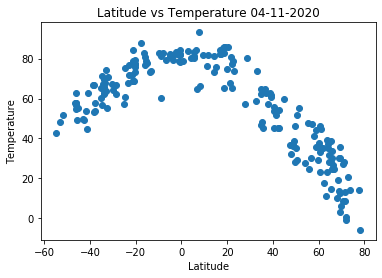

In [13]:
x_values = match_city_df['Latitude']
y_values = match_city_df['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature 04-11-2020")
plt.savefig("Images/LatTemp.png")

The scatter plot above shows Temperature on the Y-Axis and Latitude on the X-Axis. It appears as though there's a relationship.

#### Latitude vs. Humidity Plot

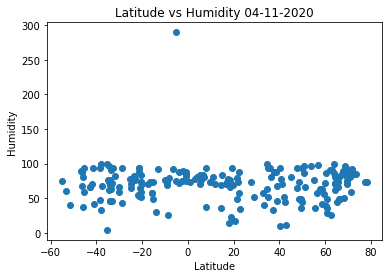

In [14]:
x_values = match_city_df['Latitude']
y_values = match_city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity 04-11-2020")
plt.savefig("Images/LatHumid.png")

The scatter plot above shows Humidity on the Y-Axis and Latitude on the X-Axis. Hard to tell from the plot whether there's a relationship.

#### Latitude vs. Cloudiness Plot

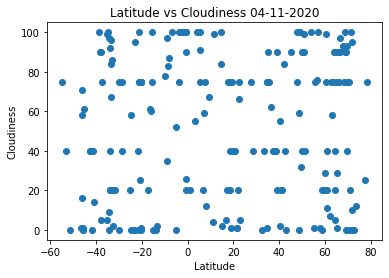

In [15]:
x_values = match_city_df['Latitude']
y_values = match_city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness 04-11-2020")
plt.savefig("Images/LatCloud.png")

The scatter plot above shows Cloudiness on the Y-Axis and Latitude on the X-Axis. Hard to tell from the plot whether there's a relationship.

#### Latitude vs. Wind Speed Plot

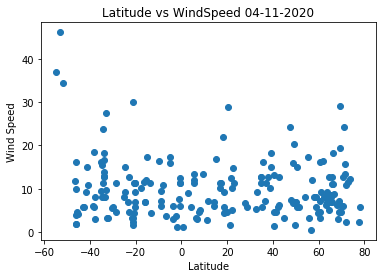

In [16]:
x_values = match_city_df['Latitude']
y_values = match_city_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs WindSpeed 04-11-2020")
plt.savefig("Images/LatWind.png")

The scatter plot above shows Wind Speed on the Y-Axis and Latitude on the X-Axis. There a couple datapoints with low latitude and high wind speeds. Most datapoints appear to be less than 20 Windspeed.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern and Southern Hemisphere DataFrames
northcity_df = city_df.loc[city_df['Lat'] > 0]
southcity_df = city_df.loc[city_df['Lat'] < 0]

In [18]:
def scatter_plot(x_values, y_values, x_label, ylabel, title, line_loc, png_filepath):
    plt.scatter(x_values, y_values, c= "purple", edgecolors="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_loc,fontsize=13,color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(png_filepath)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.82


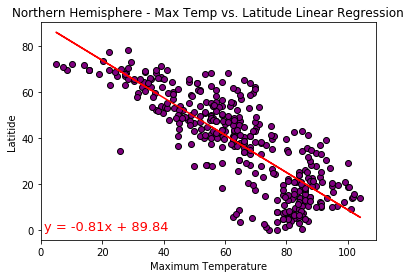

In [19]:
x_values = northcity_df["Max Temp"]
y_values = northcity_df["Lat"]
xlabel = "Maximum Temperature"
ylabel = "Latitide"
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
line_loc = (1,0)
png_filepath = "Images/NorthMaxTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.76


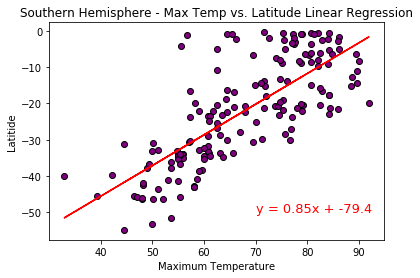

In [20]:
x_values = southcity_df["Max Temp"]
y_values = southcity_df["Lat"]
xlabel = "Maximum Temperature"
ylabel = "Latitide"
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
line_loc = (70,-50)
png_filepath = "Images/SouthMaxTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1


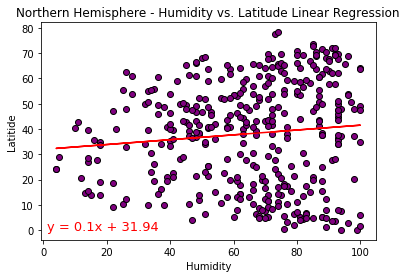

In [21]:
x_values = northcity_df["Humidity"]
y_values = northcity_df["Lat"]
xlabel = "Humidity"
ylabel = "Latitide"
title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
line_loc = (1,0)
png_filepath = "Images/NorthHumidTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15


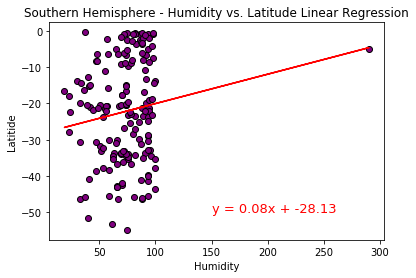

In [22]:
x_values = southcity_df["Humidity"]
y_values = southcity_df["Lat"]
xlabel = "Humidity"
ylabel = "Latitide"
title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
line_loc = (150,-50)
png_filepath = "Images/SouthHumidTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.09


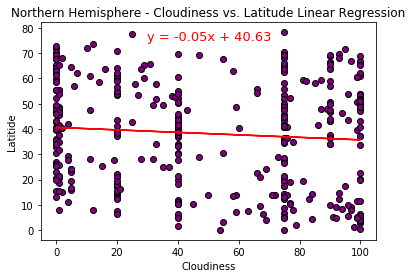

In [29]:
x_values = northcity_df["Cloudiness"]
y_values = northcity_df["Lat"]
xlabel = "Cloudiness"
ylabel = "Latitide"
title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
line_loc = (30,75)
png_filepath = "Images/NorthCloudTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.22


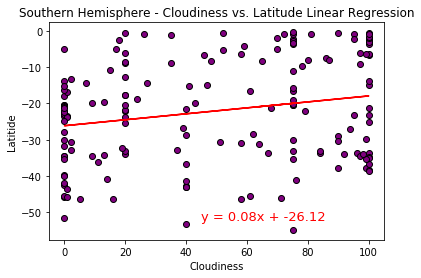

In [34]:
x_values = southcity_df["Cloudiness"]
y_values = southcity_df["Lat"]
xlabel = "Cloudiness"
ylabel = "Latitide"
title = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"
line_loc = (45,-52)
png_filepath = "Images/SouthCloudTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.11


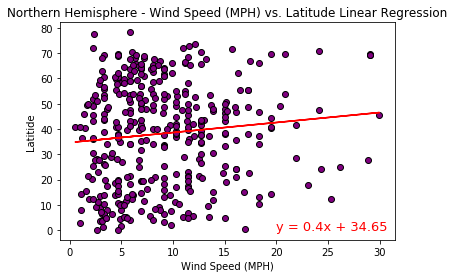

In [25]:
x_values = northcity_df["Wind Speed"]
y_values = northcity_df["Lat"]
xlabel = "Wind Speed (MPH)"
ylabel = "Latitide"
title = "Northern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression"
line_loc = (20,0)
png_filepath = "Images/NorthWindTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.32


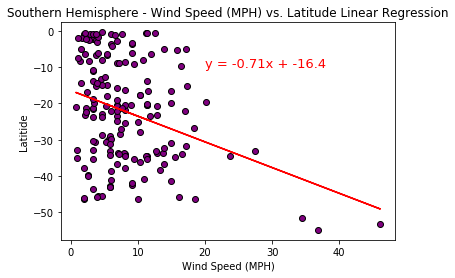

In [36]:
x_values = southcity_df["Wind Speed"]
y_values = southcity_df["Lat"]
xlabel = "Wind Speed (MPH)"
ylabel = "Latitide"
title = "Southern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression"
line_loc = (20,-10)
png_filepath = "Images/SouthWindTemp_vs_Lat_Scatter.png"

scatter_plot(x_values, y_values, xlabel, ylabel, title, line_loc, png_filepath)

In [37]:
# Export file as a CSV, without the Pandas index, but with the header
northcity_df.to_csv("Output/Northcity.csv", index=False, header=True)

In [38]:
# Export file as a CSV, without the Pandas index, but with the header
southcity_df.to_csv("Output/Southcity.csv", index=False, header=True)

Observable Trends:
#1 Latitude and Max Temperature have a strong correlations. In the northern hemisphere, its an inverse relationship. As Latitude decreases, temperatures rise. The opposite is true in the southern hemisphere. As Latitude decreases, temperature also decreases

#2 Latitude vs Wind speed, Cloudiness, or Humidity showed weak or almost no correlation at all. Only Wind Speed vs Latitude had a correlation factor of -0.32. The other 5 were between -0.3 and 0.3

#3 The API pull of the current temperatures were in line with observable trend #1. Negative Latitudes increased temperature as they increased towards 0 latitude (positive relationship). Positive Latitudes also increased temperature as they decreased towards 0 latitude (inverse relationship).